In [1]:
import os
import PIL
import numpy as np
from keras.models import *
import matplotlib.pyplot as plt 
from keras.layers import *
from keras.layers.normalization import *
from keras.models import Model
from keras.utils import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.callbacks import *

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#  /content/drive/My Drive/COVID_19_CNN/dataset
image = PIL.Image.open("/content/drive/My Drive/COVID_19_CNN/dataset/train/COVID/Covid (2).png")
image = image.convert('RGB')
image = np.array(image)

print(image.shape)
#Image_shape= X_train[0].shape

In [ ]:
def dice_loss(y_true, y_pred):
  numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=-1)
  denominator = tf.reduce_sum(y_true + y_pred, axis=-1)

  return 1 - (numerator + 1) / (denominator + 1)

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

In [ ]:
"""

classifier = Sequential()
classifier.add(Convolution2D(32,4,4,input_shape = (256,256,3), activation = 'relu'))
classifier.add (MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
"""

inputs = Input((512, 512, 1), name= 'inputs')
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name= 'conv1_1')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', name= 'conv1_2')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2), name= 'conv1_3')(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(5, (1,1), activation = 'softmax',)(conv9)

model = Model(input = inputs, output = conv10)
model.summary()

model.compile(loss = 'dice_loss', optimizer='adam', metrics=[dice_coef])

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 512, 512, 64) 640         inputs[0][0]                     
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 512, 512, 64) 36928       conv1_1[0][0]                    
__________________________________________________________________________________________________
conv1_3 (MaxPooling2D)          (None, 256, 256, 64) 0           conv1_2[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


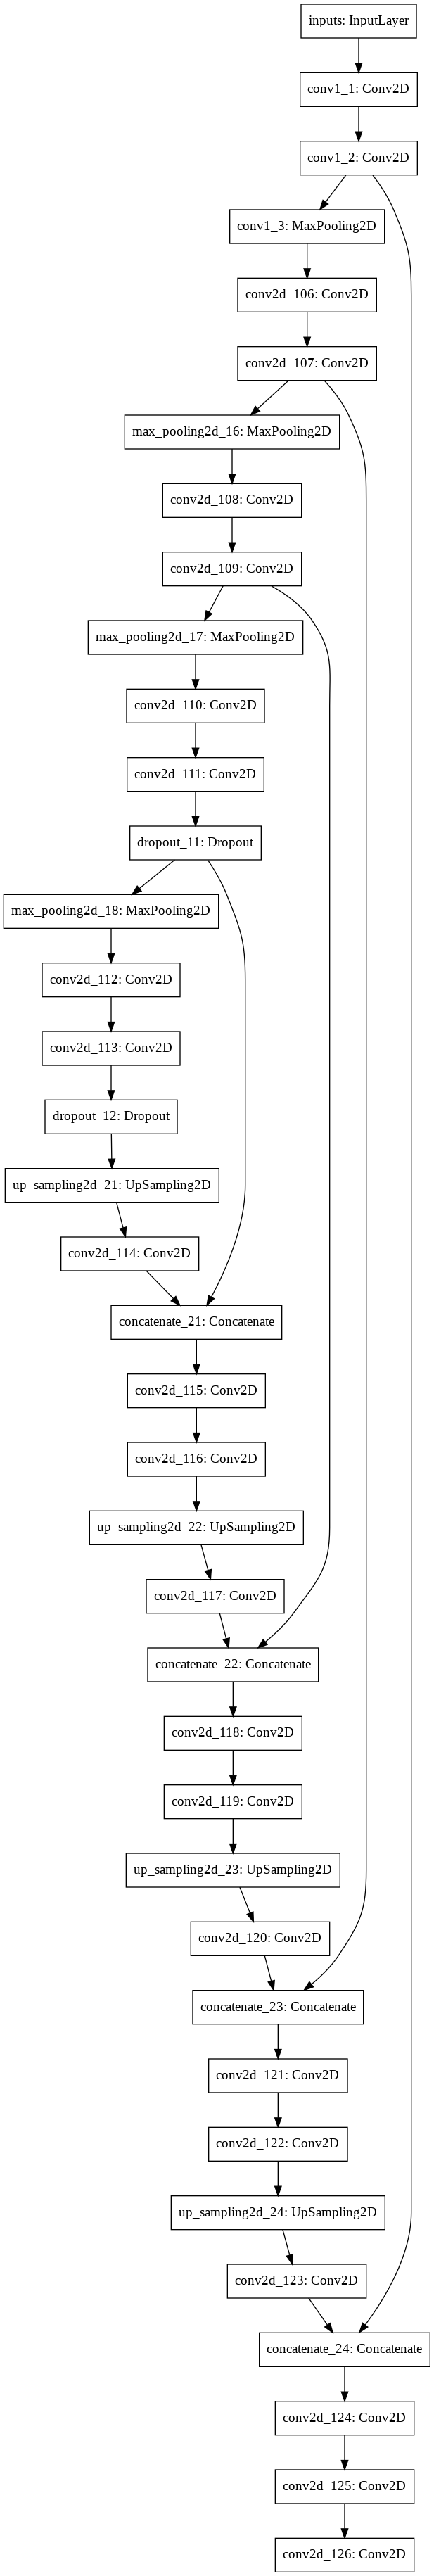

In [ ]:
plot_model(model, to_file='model.png')

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    
mask_types=[0, 85, 127, 170, 255]

def fix_mask(mask, batch_size=2):
  for i in range(batch_size):
    temp= np.zeros((512,512))
    for j in range(len(mask_types)):
      if j==0: continue
      img= (mask[i,:,:,0]==mask_types[j])*mask_types[j]
      temp = temp+img
    mask[i,:,:,0] = temp
  return mask 

def adjustData(img,mask,flag_multi_class, num_class):
    if(flag_multi_class):
        """
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
        """
        
        img = img / 255
        one_hot= np.zeros((mask.shape[0],512,512, num_class))
        #print(one_hot.shape)      
  
        for k in range(mask.shape[0]):
          data= (mask[k,:,:,0]!=0)*1
              
          for i in range(num_class):
            if i==0: continue
            data= data+ (mask[k,:,:,0]>mask_types[i])*1
          #print(np.unique(data))
          #print(data.shape)
          for i in range(num_class):
            one_hot[k,:,:,i]= (data==i)*1      
          
        mask= one_hot
        
        
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    
    
    return (img,mask)


def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (512,512),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    
    for (img,mask) in train_generator:
        mask = fix_mask(mask, batch_size=2)
        img,mask = adjustData(img,mask,flag_multi_class,num_class)        
        yield (img, mask)


myGene = trainGenerator(2,'/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/medical_segmentation/part1',
                        'training_image','Training_mask',data_gen_args,save_to_dir = None,
                        flag_multi_class=True, num_class=len(mask_types))



In [ ]:
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
image_generator = image_datagen.flow_from_directory(
        '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/medical_segmentation/part1',
        classes = ['training_image'],
        class_mode = None,
        color_mode = "grayscale",
        target_size = (512,512),
        batch_size = 2,
        save_to_dir = None,
        save_prefix  = "image",
        seed = 1)
mask_generator = mask_datagen.flow_from_directory(
        '/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/medical_segmentation/part1',
        classes = ['Training_mask'],
        class_mode = None,
        color_mode = "grayscale",
        target_size = (512,512),
        batch_size = 2,
        save_to_dir = None,
        save_prefix  = "mask",
        seed = 1)

train_generator = zip(image_generator, mask_generator)
ii=0
c=[]
for (img,mask) in train_generator:
  #print(img.shape[0])
  #print(mask.shape)
  #plt.imshow(mask[0,:,:,0])
  #plt.show()
  #plt.imshow(img[1,:,:,0])
  mask = fix_mask(mask, batch_size=2)
  #print(np.unique(mask[0,:,:,0]))
  
  #img,mask = adjustData(img,mask,flag_multi_class= True,num_class=len(mask_types))
  img = img / 255
  one_hot= np.zeros((mask.shape[0],512,512, len(mask_types)))
  print(one_hot.shape)      
  
  for k in range(mask.shape[0]):
    data= (mask[k,:,:,0]!=0)*1
              
    for i in range(len(mask_types)):
      if i==0: continue
      data= data+ (mask[k,:,:,0]>mask_types[i])*1
    print(np.unique(data))
    print(data.shape)
    for i in range(len(mask_types)):
      one_hot[k,:,:,i]= (data==i)*1      
  mask= one_hot
  #mask= one_hot
  ii=ii+1
  if ii==1: break

Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
(2, 512, 512, 5)
[0 1 3 4]
(512, 512)
[0 2 4]
(512, 512)


In [ ]:
def fix_mask(mask, batch_size=2):
  for i in range(batch_size):
    temp= np.zeros((512,512))
    for j in range(len(mask_types)):
      if j==0: continue
      img= (mask[i,:,:,0]==mask_types[j])*mask_types[j]
      temp = temp+img
    mask[i,:,:,0] = temp
  return mask 

#plt.imshow(mask[0,:,:,0])
#maskkk= mask
#maskkk= fix_mask(maskkk, batch_size=2)
#for i in range(100,200):
  #print(mask[0,200,i,0])
#c.shape[0]


In [ ]:
annealer = ReduceLROnPlateau(monitor= 'dice_coef', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5',monitor= 'dice_coef' , verbose=1, save_best_only=True)

In [ ]:
model.fit_generator(myGene,steps_per_epoch=200,epochs=10,verbose=2,
                           callbacks = [checkpoint, annealer])    

Epoch 1/10
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
 - 65s - loss: 0.0454 - dice_coef: 0.9319

Epoch 00001: dice_coef improved from inf to 0.93188, saving model to model.h5
Epoch 2/10
 - 63s - loss: 0.0426 - dice_coef: 0.9361

Epoch 00002: dice_coef did not improve from 0.93188
Epoch 3/10
 - 63s - loss: 0.0426 - dice_coef: 0.9361

Epoch 00003: dice_coef did not improve from 0.93188
Epoch 4/10
 - 63s - loss: 0.0426 - dice_coef: 0.9361

Epoch 00004: dice_coef did not improve from 0.93188
Epoch 5/10
 - 63s - loss: 0.0426 - dice_coef: 0.9361

Epoch 00005: dice_coef did not improve from 0.93188
Epoch 6/10
 - 63s - loss: 0.0426 - dice_coef: 0.9361

Epoch 00006: dice_coef did not improve from 0.93188

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.001.
Epoch 7/10
 - 63s - loss: 0.0426 - dice_coef: 0.9361

Epoch 00007: dice_coef did not improve from 0.93188
Epoch 8/10
 - 63s - loss: 0.0426 - dice_coef: 0.9361

Epoch 00008: dice_coef did not 

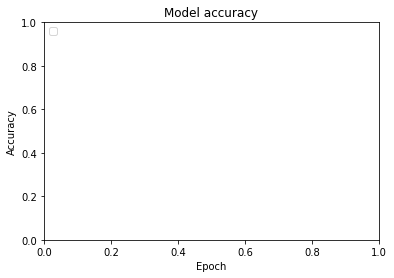

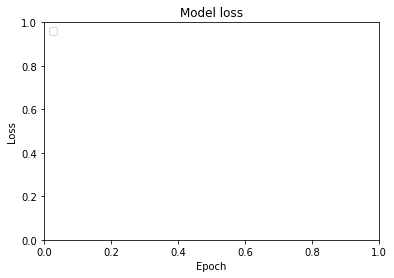

In [ ]:

# Plot training & validation accuracy values
#plt.plot(history.history[metrics])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
model.load_weights('model.h5')

In [ ]:
x_data = cv2.imread('/content/drive/My Drive/CT_SCAN_SARS-COV_2/dataset/medical_segmentation/part1/validation_image/val_im_z002.png').astype("int16")
x_data = x_data[:,:,:,np.newaxis]


plt.imshow(model.predict(x_data, cmap='gray')

SyntaxError: ignored

In [ ]:
plt.imshow(Y[0,:,:])


NameError: ignored

In [ ]:
mask= Y[1,:,:]    # 0 85 127 170 255  
#for i in range(50, 80):

print(np.unique(mask))

In [ ]:
plt.imshow(mask)

In [ ]:
plt.imshow(mask)

In [ ]:
data= (mask!=0)*1
mask_types=[0, 85, 127, 170, 255]
for i in range(len(mask_types)):
  if i==0: continue
  data= data+ (mask>mask_types[i])*1


In [ ]:
plt.imshow(data)
data[400,400]

In [ ]:
print(np.unique(data))

In [ ]:
one_hot= np.zeros((512,512, len(mask_types)))
print(one_hot.shape)

In [ ]:
for i in range(len(mask_types)):
  one_hot[:,:,i]= (data==i)*1

In [ ]:
plt.imshow(one_hot[:,:,0])

In [ ]:
one_hot[2,2,0]

In [ ]:
print(one_hot.shape)

In [ ]:
import model_unet

model = model_unet.unet(input_size = (512,512,1))